<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [2]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
# Import libraries
import pandas as pd

# Load the dataset
file_path = r"C:\Users\ohene\OneDrive\Documents\new_repo\Module 7 New\transfusion.data"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


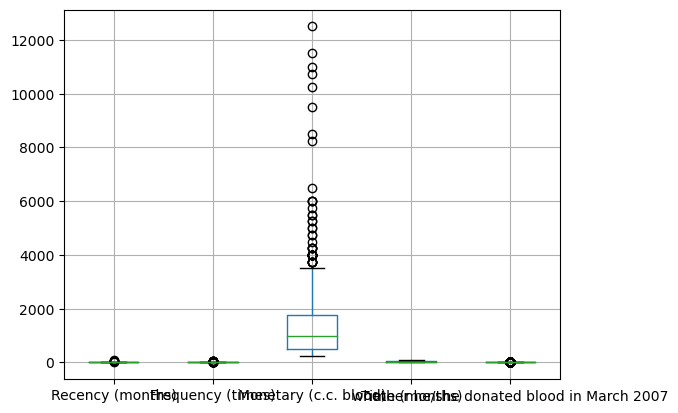

In [6]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [7]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3 - q1

lower_bound= q1-1.5*iqr
upper_bound= q3+1.5*iqr

df_no_outliers = df[~((df < lower_bound)|(df > upper_bound)).any(axis=1)]

In [8]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 5 to 745
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            538 non-null    int64
 1   Frequency (times)                           538 non-null    int64
 2   Monetary (c.c. blood)                       538 non-null    int64
 3   Time (months)                               538 non-null    int64
 4   whether he/she donated blood in March 2007  538 non-null    int64
dtypes: int64(5)
memory usage: 25.2 KB


In [9]:
import pandas as pd

# Checking the data after cleaning (assuming df_no_outliers is ready)
df_no_outliers.describe()

# Checking class distribution
print(df_no_outliers['whether he/she donated blood in March 2007'].value_counts())


0    538
Name: whether he/she donated blood in March 2007, dtype: int64


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [10]:
# Features and target
X = df_no_outliers.drop(columns='whether he/she donated blood in March 2007')
y = df_no_outliers['whether he/she donated blood in March 2007']

# Perform a stratified train-test split to maintain class distribution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution in training and test sets
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 0    376
Name: whether he/she donated blood in March 2007, dtype: int64
Test set class distribution:
 0    162
Name: whether he/she donated blood in March 2007, dtype: int64


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [9]:
X = df.drop(columns='whether he/she donated blood in March 2007')
y = df['whether he/she donated blood in March 2007']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model= DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = model.predict(X_test)
y_train_pred =model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy= accuracy_score(y_test, y_pred)
print(train_accuracy)
print(test_accuracy)

0.8374760994263862
0.7511111111111111


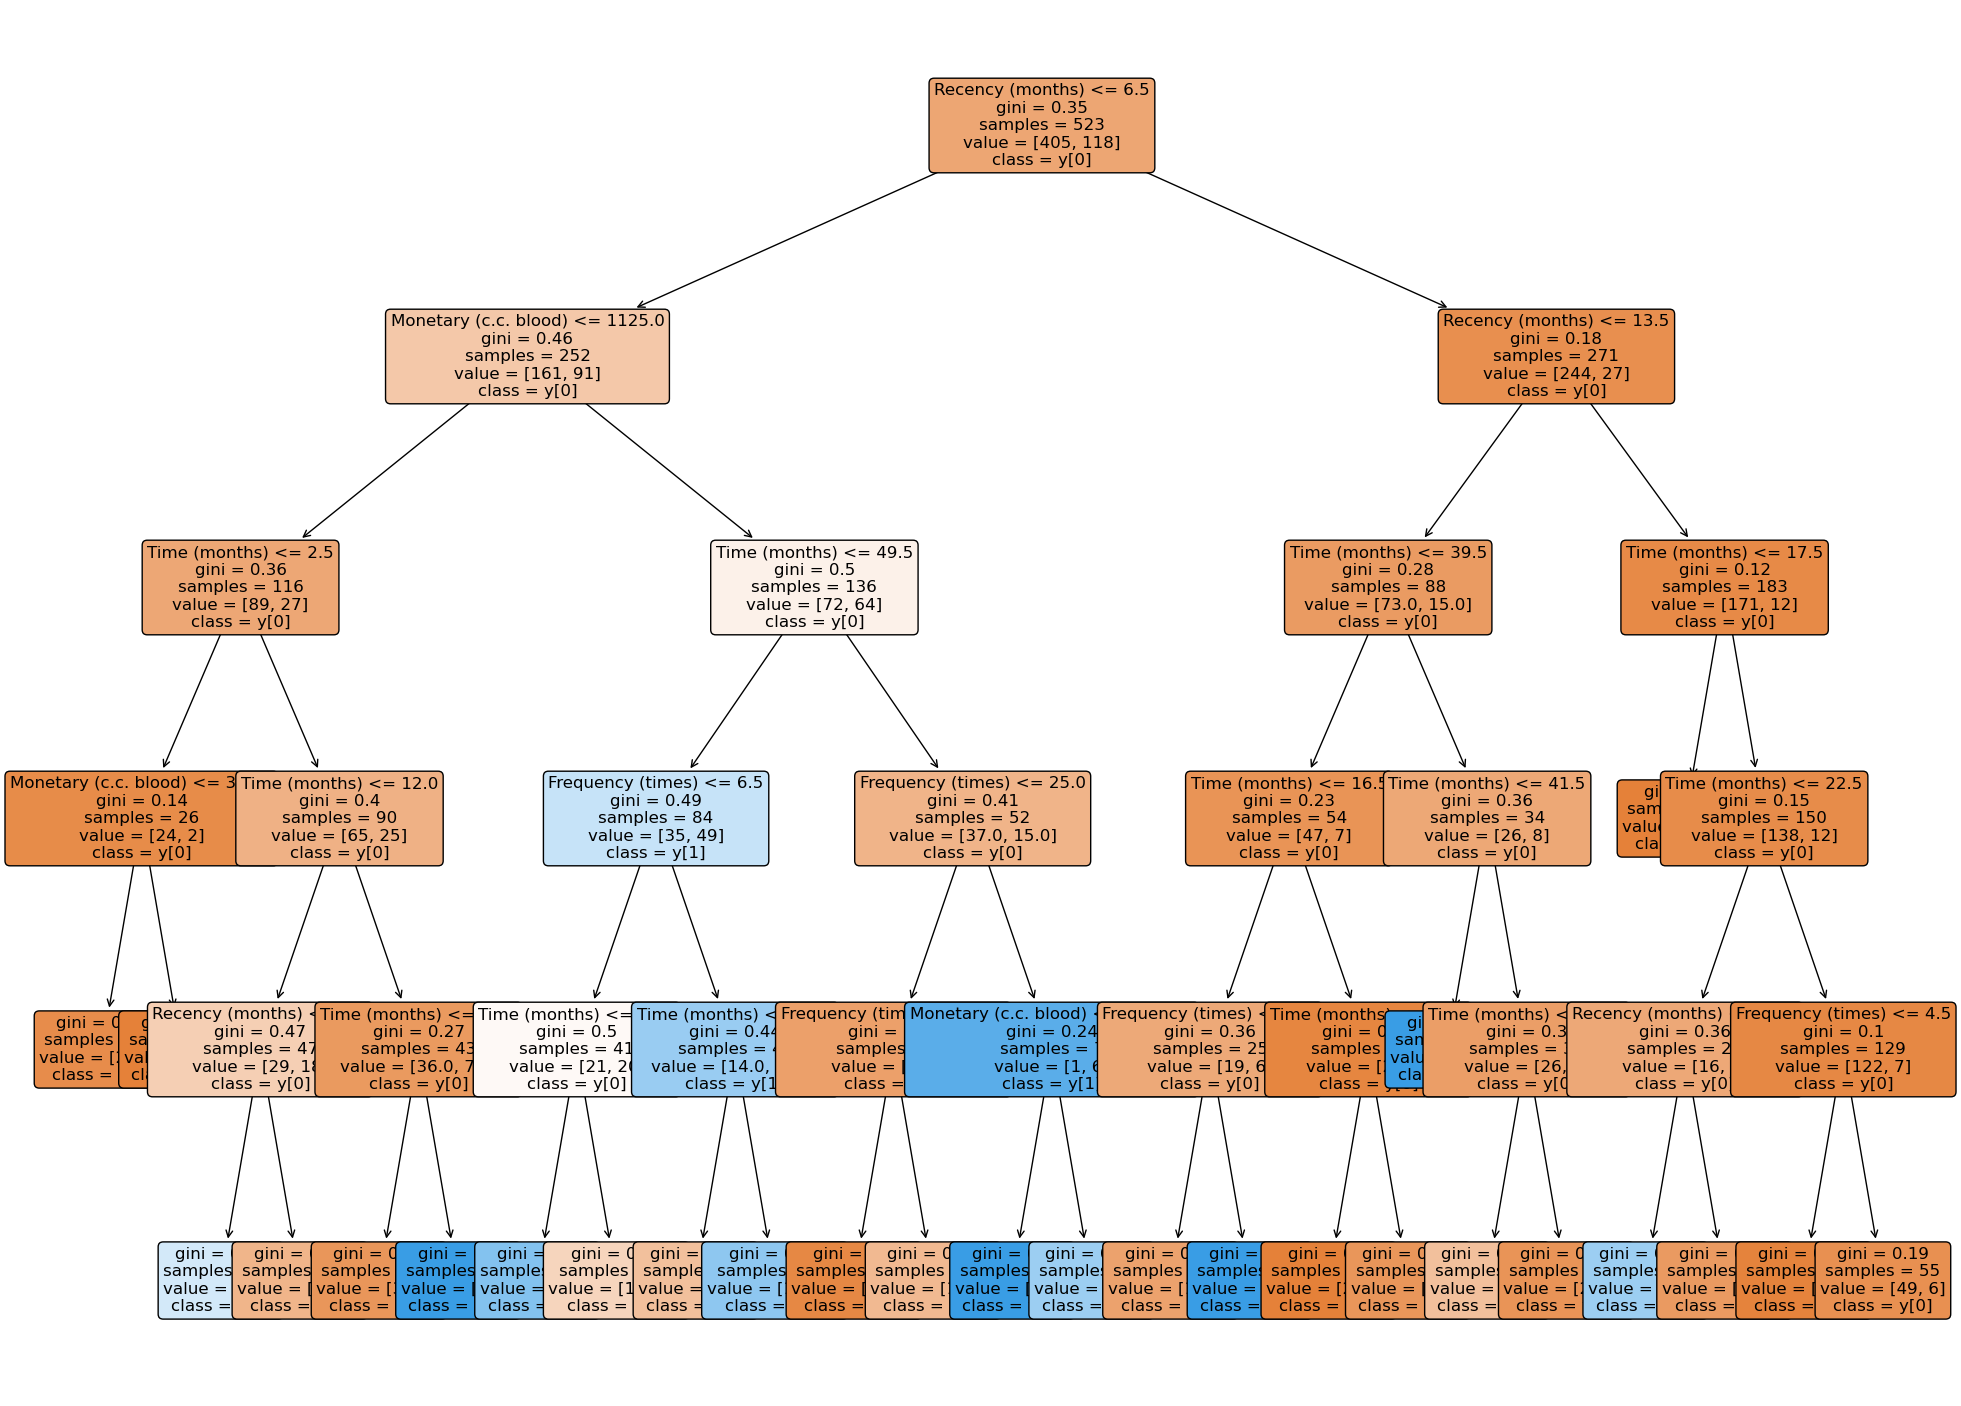

In [14]:
plt.figure(figsize=(24, 18)) 
plot_tree(
    model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=True, 
    fontsize=12,       
    proportion=False,   
    rounded=True,       
    precision=2         
)
plt.show()

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [11]:
# Number of observations
total_observations = df_no_outliers.shape[0]
print(f"Total number of observations: {total_observations}")

# Check class distribution in the target variable
class_distribution = df_no_outliers['whether he/she donated blood in March 2007'].value_counts()
print("Class distribution:\n", class_distribution)

# Percentage of each class
class_percentage = class_distribution / total_observations * 100
print("Class percentage:\n", class_percentage)


Total number of observations: 538
Class distribution:
 0    538
Name: whether he/she donated blood in March 2007, dtype: int64
Class percentage:
 0    100.0
Name: whether he/she donated blood in March 2007, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_no_outliers.drop(columns='whether he/she donated blood in March 2007')
y = df_no_outliers['whether he/she donated blood in March 2007']

# Perform a stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution in training and test sets
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set class distribution:
 0    376
Name: whether he/she donated blood in March 2007, dtype: int64
Test set class distribution:
 0    162
Name: whether he/she donated blood in March 2007, dtype: int64


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Step 9: Fit the Model

In [16]:


# Fitting the best model on the training data
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions on the training data
y_train_pred = best_rf_model.predict(X_train)
y_train_proba = best_rf_model.predict_proba(X_train)[:, 0]  # Probability for class 1

# Evaluate the training performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print("Training Accuracy:", train_accuracy)
print("Training ROC AUC:", train_roc_auc)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_test_pred = best_rf_model.predict(X_test)
y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate accuracy and ROC AUC
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Test Accuracy:", test_accuracy)
print("Test ROC AUC:", test_roc_auc)

# Confusion Matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", test_conf_matrix)

# Classification Report (precision, recall, f1-score)
test_class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", test_class_report)


IndexError: index 1 is out of bounds for axis 1 with size 1

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



